In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
df= pd.read_csv("rawdata.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24949 entries, 0 to 24948
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24949 non-null  object 
 1   TinhTrangBDS      24924 non-null  object 
 2   DienTich          24917 non-null  object 
 3   Gia/m2            24916 non-null  object 
 4   Phongngu          24926 non-null  object 
 5   TenPhanKhu        7035 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24926 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12790 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5601 non-null   object 
 15  Gia               24949 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

# 1. Tiền xử lý dữ liệu

In [4]:
## Mình sẽ chỉ lấy những data có dữ liệu về diện tích 
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]
## Có thể thấy 2 trường dữ liệu Gia/m2 và Gia tương đương nhau nên mình sẽ xóa trường này đi
del df1["Gia/m2"]

In [5]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

In [6]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
        
del df3['level_0']
del df3['index']
df4 = df3[df3.Loai.notnull()]

In [7]:
## truc quan truong gia tri Gia
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]

In [8]:
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
df4 = df4.drop([15232])
df4 = df4.reset_index()

In [9]:
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [10]:
df4.Quan.unique()

array([' Quận 7', ' Quận Bình Tân', ' Quận Tân Bình', ' Quận 6',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh',
       ' Huyện Hóc Môn', ' Quận Thủ Đức', ' Quận 9', ' Quận 10',
       ' Huyện Nhà Bè', ' Quận 12', ' Quận Tân Phú', ' Quận 2',
       ' Quận Phú Nhuận', ' Quận 1', ' Quận 4', ' Quận 11', ' Quận 5',
       ' Quận Gò Vấp', ' Quận 3', ' Huyện Củ Chi'], dtype=object)

In [11]:
frame = df4[['DiaChi','Quan','TinhTrangBDS','DienTich','Phongngu','TenPhanKhu','SoTang','PhongTam','Loai','GiayTo','MaCanHo'
             ,'TinhTrangNoiThat' ,'HuongCuaChinh','HuongBanCong','DacDiem',"Gia"]]
frame.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2e+09
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95,3,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.3e+09


In [12]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float') 
frame.PhongTam = frame.PhongTam.astype('float') 
frame.Gia = frame.Gia.astype('float') 
frame.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,24086.000000,24086.000000,6552.000000,24086.000000,2.408600e+04
mean,232.163841,2.052230,11.347222,1.754048,2.870769e+09
std,9943.563316,0.746907,15.322589,0.612478,7.898340e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


In [13]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index)
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index)
frame['log_price'] = np.log(frame.USD)

print("The number of row after cleaning data:",len(frame))

The number of row after cleaning data: 24019


In [14]:
frame.to_csv('dataset.csv',encoding="utf-8-sig",index=False)

# 2. Trực quan dữ liệu

### 2.1 Trực quan những giá trị dạng số 

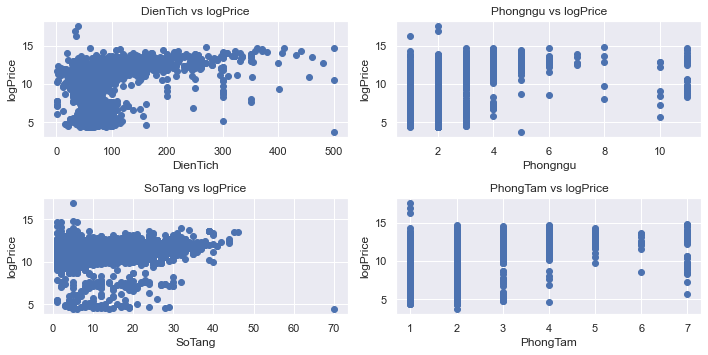

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['log_price'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()

2 trường dữ liệu phòng ngủ và phòng tắm không ảnh hưởng quá nhiều tới giá 

## 2.2 Trực quan những giá categorical

In [16]:
frame1 = frame[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong'
                ,'DacDiem','Gia','USD']]
bins = [42,67917,106250,40833333]

In [17]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('house Range vs Price')
    plt.show()

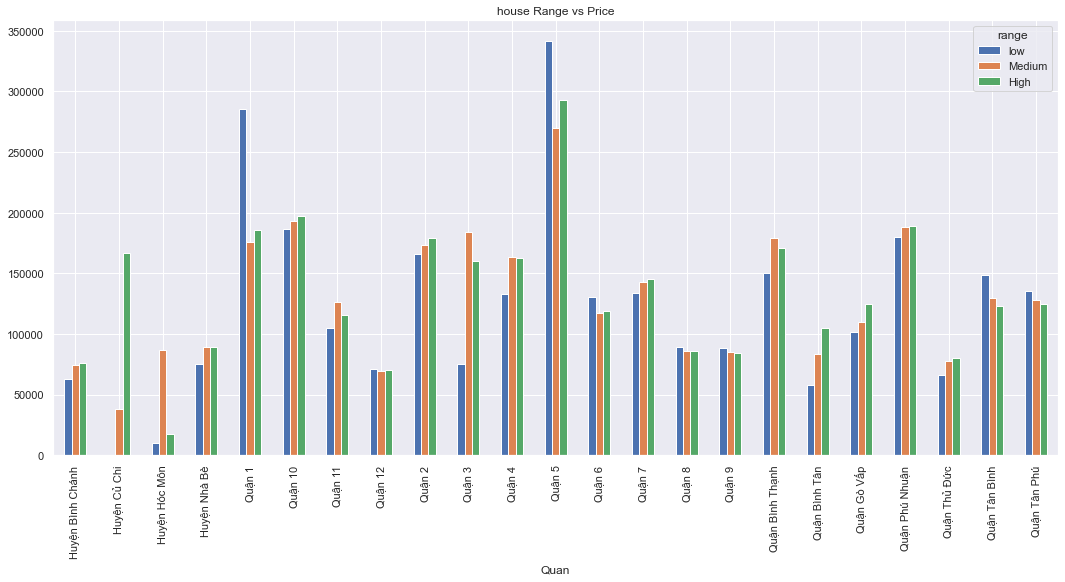

In [18]:
Analyst('Quan')

* Quận 5 , Quận 10, Quận 1 , Quận Phú Nhuận là những quận có giá chung cư cao nhất

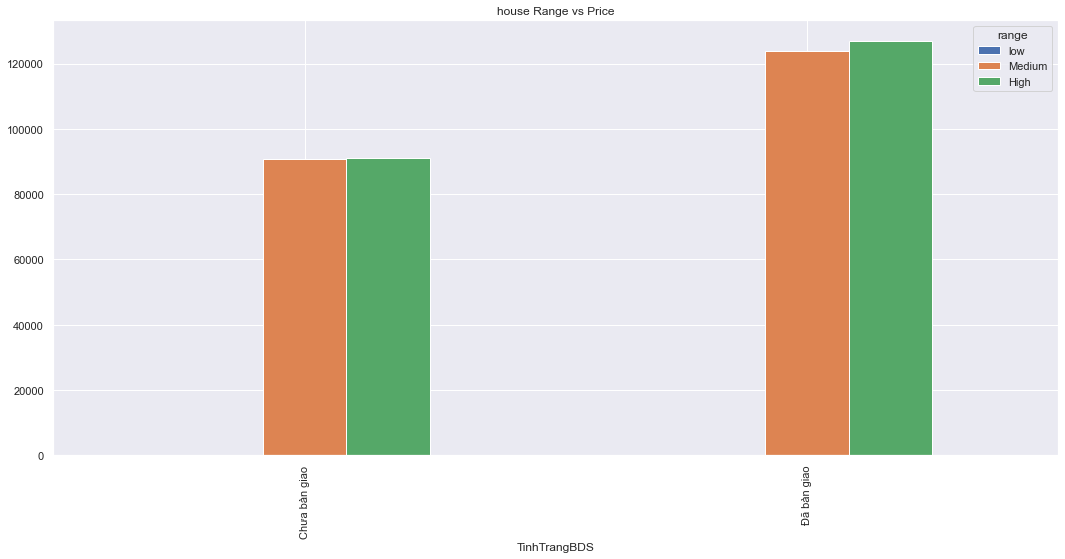

In [19]:
Analyst('TinhTrangBDS')

Có thể thấy những chung cư đã được bàn giao có giá **cao hơn** so với chưa được bàn giao

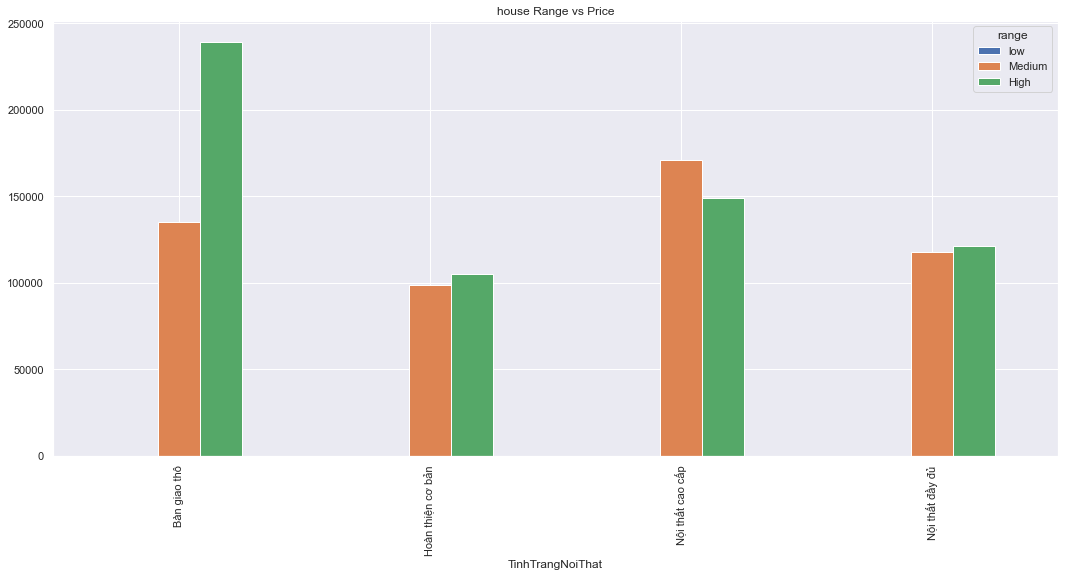

In [20]:
Analyst('TinhTrangNoiThat')

Nội thất được bàn giao thô được ưa chuộng trong những khu căn hộ với giá cao 

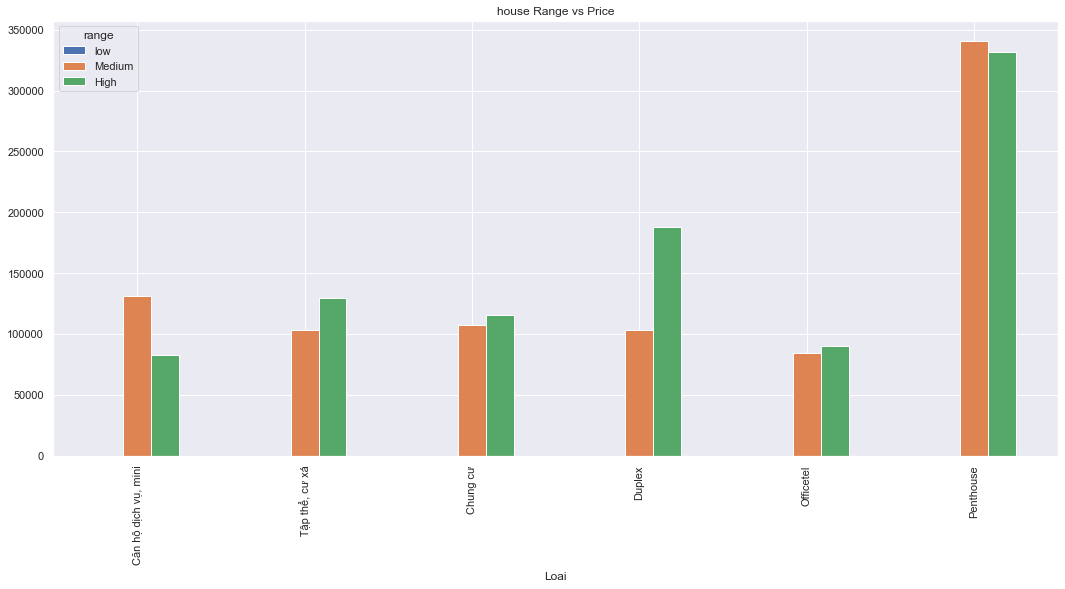

In [21]:
Analyst('Loai')

Những căn chung cư có giá trung bình đến cao thường là penthouse

In [22]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

Đông Nam    1639
Đông         877
Tây Nam      790
Đông Bắc     732
Bắc          698
Tây          647
Tây Bắc      624
Nam          562
Name: HuongBanCong, dtype: int64


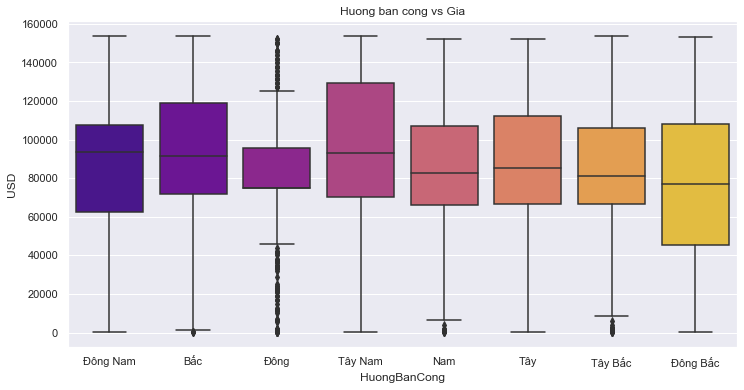

Đông Nam    1403
Tây Bắc     1270
Nam         1001
Đông Bắc     907
Đông         789
Tây Nam      630
Tây          488
Bắc          428
Name: HuongCuaChinh, dtype: int64


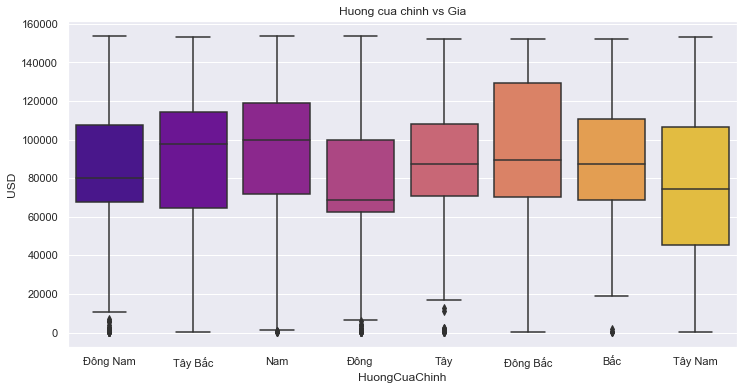

Chung cư                 17872
 Căn hộ dịch vụ, mini      633
Officetel                  360
Duplex                     195
Penthouse                   69
 Tập thể, cư xá             47
Name: Loai, dtype: int64


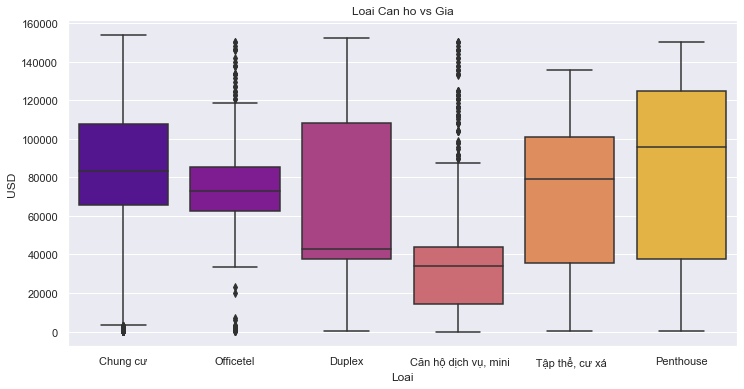

Đã có sổ        6817
Đang chờ sổ     6009
Giấy tờ khác    1545
Name: GiayTo, dtype: int64


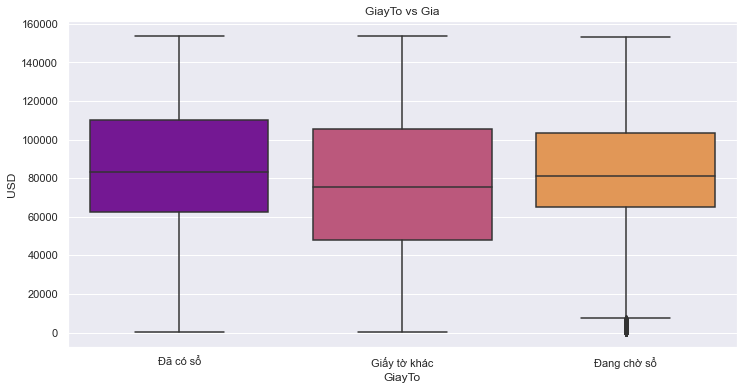

In [23]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai Can ho vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Gia')
plt.show()

Có thể thấy trường dữ liệu giấy tờ không ảnh hưởng quá nhiều tới giá nhà 

# 3. Chạy thuật toán dự đoán giá 

## 3.1 linear regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('dataset.csv')

In [26]:
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
count,24019.000000,24019.000000,6529.000000,24019.000000,2.401900e+04,2.401900e+04,24019.000000
mean,71.638943,2.049877,10.987594,1.751946,2.840117e+09,1.183382e+05,11.354806
std,30.631627,0.740393,7.378406,0.606200,7.788500e+09,3.245208e+05,0.992961
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06,4.200000e+01,3.737670
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09,6.791700e+04,11.126042
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09,9.458300e+04,11.457233
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09,1.375000e+05,11.831379
max,500.000000,11.000000,70.000000,7.000000,9.800000e+11,4.083333e+07,17.525009


In [27]:
df['Rank'] = df.USD.copy()
df_1 = df[df['USD'] < 50000]
df_2 = df[(df['USD'] >= 50000) & (df['USD'] < 100000)]
df_3 = df[(df['USD'] >= 100000) & (df['USD'] < 150000)]
df_4 = df[df['USD'] >= 150000]

In [28]:
df_2.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price,Rank
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600,83333.0
5,"196, 196 Đường Cao Lỗ, Phường 4, Quận 8, Tp Hồ...",Quận 8,Đã bàn giao,71.0,2.0,NaN,NaN,1.0,Chung cư,Đang chờ sổ,NaN,NaN,NaN,NaN,NaN,1.980000e+09,82500.0,11.320554,82500.0


In [29]:
## Tìm những trường dữ liệu có giá trị NaN
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['TinhTrangBDS',
 'TenPhanKhu',
 'SoTang',
 'GiayTo',
 'MaCanHo',
 'TinhTrangNoiThat',
 'HuongCuaChinh',
 'HuongBanCong',
 'DacDiem']

In [30]:
## Tỉ lệ NaN của các trường dữ liệu
df.isna().sum()/df.shape[0]*100

DiaChi               0.000000
Quan                 0.000000
TinhTrangBDS         0.008327
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          71.418460
SoTang              72.817353
PhongTam             0.000000
Loai                 0.000000
GiayTo              23.868604
MaCanHo             86.339981
TinhTrangNoiThat    48.290936
HuongCuaChinh       61.834381
HuongBanCong        64.603023
DacDiem             77.388734
Gia                  0.000000
USD                  0.000000
log_price            0.000000
Rank                 0.000000
dtype: float64

### Drop các cột dữ liệu theo % 

In [31]:
per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [32]:
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
#df_dropped_2 = df_dropped.dropna(axis=0,thresh=int(df.shape[1]*0.5))
df_dropped_2

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Rank
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,5.300000e+09,220833.0,12.305162,220833.0
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,4.000000e+09,166667.0,12.023753,166667.0
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp,2.950000e+09,122917.0,11.719265,122917.0
8,"Đường Hồ Học Lãm, Phường An Lạc, Quận Bình Tân...",Quận Bình Tân,Đã bàn giao,50.0,1.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.390000e+09,57917.0,10.966766,57917.0
13,"Đường Số 45, Phường Trường Thạnh, Quận 9, Tp H...",Quận 9,Đã bàn giao,80.0,4.0,4.0,"Căn hộ dịch vụ, mini",Đang chờ sổ,Bàn giao thô,4.500000e+09,187500.0,12.141534,187500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24013,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,68.0,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,2.450000e+09,102083.0,11.533541,102083.0
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,87500.0
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,64583.0
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,110417.0


In [33]:
## Do giá tiền Việt quá lớn nên mình sẽ chuyển về dạng USD 
df_x = df_dropped_2.iloc[:, 1:9]
df_x

,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat
1,Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
3,Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
4,Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp
8,Quận Bình Tân,Đã bàn giao,50.0,1.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
13,Quận 9,Đã bàn giao,80.0,4.0,4.0,"Căn hộ dịch vụ, mini",Đang chờ sổ,Bàn giao thô
...,...,...,...,...,...,...,...,...
24013,Quận 8,Đã bàn giao,68.0,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
24014,Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
24015,Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp
24017,Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ


In [34]:
df_y = df_dropped_2.iloc[:, 10]
df_y

1        220833.0
3        166667.0
4        122917.0
8         57917.0
13       187500.0
           ...   
24013    102083.0
24014     87500.0
24015     64583.0
24017    110417.0
24018     79167.0
Name: USD, Length: 11970, dtype: float64

### Get dummies values 

In [35]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,Quan_ Huyện Củ Chi,Quan_ Huyện Hóc Môn,Quan_ Huyện Nhà Bè,Quan_ Quận 1,Quan_ Quận 10,Quan_ Quận 11,Quan_ Quận 12,...,"Loai_ Tập thể, cư xá",Loai_Chung cư,Loai_Duplex,Loai_Officetel,Loai_Penthouse,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,TinhTrangNoiThat_Hoàn thiện cơ bản,TinhTrangNoiThat_Nội thất cao cấp,TinhTrangNoiThat_Nội thất đầy đủ
1,95.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,70.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,83.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,50.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13,80.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24013,68.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24014,53.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24015,76.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24017,82.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Scale data về dạng chuẩn

In [36]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [37]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[ 0.65660282,  1.2936019 ,  0.40415867, ..., -0.75705817,
         1.40443443, -0.62391968],
       [-0.10878211, -1.45088848, -1.2492177 , ..., -0.75705817,
         1.40443443, -0.62391968],
       [ 0.28921806, -0.07864329,  0.40415867, ..., -0.75705817,
         1.40443443, -0.62391968],
       ...,
       [ 0.07491028, -0.07864329, -1.2492177 , ..., -0.75705817,
         1.40443443, -0.62391968],
       [ 0.25860266, -0.07864329,  0.40415867, ..., -0.75705817,
        -0.7120304 ,  1.60277041],
       [-0.41493608, -0.07864329, -1.2492177 , ..., -0.75705817,
         1.40443443, -0.62391968]])

### Split data 80% để train , 20% để test

In [38]:
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

### Linear

In [39]:
reg = LinearRegression().fit(X, Y)

In [40]:
reg.predict(X_test)

array([171792.31846417, 235200.74540109,  47600.04948363, ...,
       389544.45407788, 204993.75994528,  62389.22504859])

In [41]:
Y_test

16776    154167.0
7015     279167.0
10472     45417.0
15926     80833.0
5134      89583.0
           ...   
10457    106250.0
22654    354167.0
22251    733333.0
863      135417.0
5871      68750.0
Name: USD, Length: 2394, dtype: float64

In [42]:
Y_pre = reg.predict(X_test)

In [43]:
perc = np.abs((Y_pre - Y_test)/Y_test)
perc = perc.values*100

In [44]:
np.array([Y_pre, Y_test, perc])

array([[1.71792318e+05, 2.35200745e+05, 4.76000495e+04, ...,
        3.89544454e+05, 2.04993760e+05, 6.23892250e+04],
       [1.54167000e+05, 2.79167000e+05, 4.54170000e+04, ...,
        7.33333000e+05, 1.35417000e+05, 6.87500000e+04],
       [1.14326143e+01, 1.57490873e+01, 4.80667918e+00, ...,
        4.68802776e+01, 5.13796347e+01, 9.25203629e+00]])

In [45]:
data = {'Gia du doan':Y_pre,
        'Gia thuc':Y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)

In [46]:
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
6195,107938.638007,107917.0,0.020051
10241,75065.352680,75000.0,0.087137
22484,72852.208876,72917.0,0.088856
14900,37535.367367,37500.0,0.094313
17645,91514.598630,91667.0,0.166255
...,...,...,...
23336,114518.397066,123.0,93004.387858
8012,269504.463744,288.0,93477.938800
11188,118328.929702,104.0,113677.817022
16257,99755.967015,85.0,117259.961194


In [47]:
B['% sai lech'].describe()

count      2394.000000
mean        584.555107
std        6473.685126
min           0.020051
25%           9.499406
50%          20.165584
75%          44.027174
max      141755.768024
Name: % sai lech, dtype: float64

**Nhận xét:** Có thể thấy mô hình fit với những căn nhà có giá thấp cho tới trung bình . Còn những căn nhà ở mức cao thì các thông số đưa ra trong bộ dataset sẽ không còn ảnh hưởng tới mức giá nữa (đặc biệt là những outliner mạnh hay những data nhiễu được đưa vào thì dự đoán sẽ sai lệch rất lớn )

### Tính sai lệch trung bình

In [48]:
(sum((reg.predict(X_test) - Y_test)**2)/len(Y_test))**0.5

77355.6755821147

**Nhận xét:** Sai lệch trung bình của dataset là khoảng 77355 usd với lý do đã kể trên 

## 3.2 Kết hợp logistic regression và linear regression

In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score  
df= pd.read_csv('dataset.csv')

In [50]:
df['Rank'] = df.USD.copy()

**Ý tưởng:** Chia giá tiền các căn chung cư thành 4 mức giá từ thấp -> cao và thực hiện logis data dựa theo mức rank này. Mỗi data test được đưa vào sẽ được phân loại vào 1 trong 4 mức kể trên . Từ đó lựa chọn mô hình linear phù hợp để chạy thuật toán dự đoán cho ra kq tốt nhất

In [51]:
df['Rank'][df['USD'] < 50000] = 1
df['Rank'][(df['USD'] >= 50000) & (df['USD'] < 100000)] = 2
df['Rank'][(df['USD'] >= 100000) & (df['USD'] < 150000)] = 3
df['Rank'][df['USD'] >= 150000] = 4

In [52]:
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
df_dropped_2

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Rank
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,5.300000e+09,220833.0,12.305162,4.0
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,4.000000e+09,166667.0,12.023753,4.0
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp,2.950000e+09,122917.0,11.719265,3.0
8,"Đường Hồ Học Lãm, Phường An Lạc, Quận Bình Tân...",Quận Bình Tân,Đã bàn giao,50.0,1.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.390000e+09,57917.0,10.966766,2.0
13,"Đường Số 45, Phường Trường Thạnh, Quận 9, Tp H...",Quận 9,Đã bàn giao,80.0,4.0,4.0,"Căn hộ dịch vụ, mini",Đang chờ sổ,Bàn giao thô,4.500000e+09,187500.0,12.141534,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24013,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,68.0,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,2.450000e+09,102083.0,11.533541,3.0
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,2.0
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,2.0
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,3.0


In [53]:
df_x = df_dropped_2.iloc[:, 1:9]
df_x

,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat
1,Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
3,Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
4,Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp
8,Quận Bình Tân,Đã bàn giao,50.0,1.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
13,Quận 9,Đã bàn giao,80.0,4.0,4.0,"Căn hộ dịch vụ, mini",Đang chờ sổ,Bàn giao thô
...,...,...,...,...,...,...,...,...
24013,Quận 8,Đã bàn giao,68.0,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
24014,Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
24015,Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp
24017,Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ


In [54]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]

In [55]:
df_y = df_dropped_2.iloc[:, 10:13]
df_y

,USD,log_price,Rank
1,220833.0,12.305162,4.0
3,166667.0,12.023753,4.0
4,122917.0,11.719265,3.0
8,57917.0,10.966766,2.0
13,187500.0,12.141534,4.0
...,...,...,...
24013,102083.0,11.533541,3.0
24014,87500.0,11.379394,2.0
24015,64583.0,11.075706,2.0
24017,110417.0,11.612019,3.0


In [56]:
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

In [57]:
Rank = Y.iloc[:, 2]
lr = LogisticRegression()  
lr.fit(X, Rank)

LogisticRegression()

In [58]:
y_pre = lr.predict(X_test)

In [59]:
Rank_test = Y_test.iloc[:, 2]
accuracy = accuracy_score(Rank_test, y_pre)*100 
accuracy

67.33500417710944

Độ chính xác của phân loại data theo rank là 67%

In [60]:
X['USD'] = Y.iloc[:, 0]

In [61]:
df_1 = X[X['USD'] < 50000]
df_2 = X[(X['USD'] >= 50000) & (X['USD'] < 100000)]
df_3 = X[(X['USD'] >= 100000) & (X['USD'] < 150000)]
df_4 = X[X['USD'] < 50000]

In [62]:
df_1_x = df_1.iloc[:, :36]
df_1_y = df_1.iloc[:, 36]

df_2_x = df_2.iloc[:, :36]
df_2_y = df_2.iloc[:, 36]

df_3_x = df_3.iloc[:, :36]
df_3_y = df_3.iloc[:, 36]

df_4_x = df_4.iloc[:, :36]
df_4_y = df_4.iloc[:, 36]

In [63]:
reg_1 = LinearRegression().fit(df_1_x, df_1_y)
reg_2 = LinearRegression().fit(df_2_x, df_2_y)
reg_3 = LinearRegression().fit(df_3_x, df_3_y)
reg_4 = LinearRegression().fit(df_4_x, df_4_y)

In [64]:
rank_pre = lr.predict(X_test)

In [65]:
np.unique(rank_pre, return_counts=True)

(array([1., 2., 3., 4.]), array([267, 872, 560, 695]))

Có thể thấy những data có rank = 4 chiếm khá nhiều trong dataset nên % độ sai lệch có thể sẽ khá cao 

In [66]:
y_pre = []
for i in range(0, len(rank_pre)):
    if rank_pre[i] == 1:
        y_pre.append(reg_1.predict(np.array([X_test.iloc[i]])))
    elif rank_pre[i] == 2:
        y_pre.append(reg_2.predict(np.array([X_test.iloc[i]])))
    elif rank_pre[i] == 3:
        y_pre.append(reg_3.predict(np.array([X_test.iloc[i]])))
    elif rank_pre[i] == 4:
        y_pre.append(reg_4.predict(np.array([X_test.iloc[i]])))

In [67]:
y_pre[0]

array([27028.10521117])

In [68]:
Y_test.iloc[:, 0].values

array([154167., 279167.,  45417., ..., 733333., 135417.,  68750.])

In [69]:
perc = np.abs((y_pre[0] - Y_test.iloc[:, 0].values)/Y_test.iloc[:, 0].values)
perc = perc*100

In [70]:
data = {'Gia du doan':y_pre[0],
        'Gia thuc':Y_test.iloc[:, 0].values,
       '% sai lech': perc}
A = pd.DataFrame(data)

ValueError: arrays must all be same length

In [ ]:
B = A.sort_values(by=['% sai lech'])
B

### Tính trung bình % sai lệch

In [ ]:
(sum((y_pre[0] - Y_test.iloc[:, 0].values)**2)/len(y_pre[0]))**0.5

**Nhận xét:** Có thể thấy việc phối hợp thêm thuật toán phân lớp trong dataset này không những không giúp cải thiện mà còn làm tệ đi độ sai lệch trung bình khi dự đoán 